In [1]:
import numpy as np 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, metrics
import datetime
import cv2

2023-07-21 09:56:29.243680: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 09:56:29.719634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#setting directory 
base_filename = "gaus_adaptive"
dir_path = f"/home/neureol/FD/preprocessed_clean_images/{base_filename}/"

Attempting loading images into the train_ds and valid_test_ds without batching

In [3]:
# setting train and tests size and batching parameters
val_size = 0.3
batch_size = None

In [4]:
# setting img parameters
img_height = 224
img_width = 224
img_size = (img_height, img_width)

In [5]:
# train dataset in batches
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = dir_path,
    validation_split=val_size,
    subset="training",
    seed=0,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
)

Found 3418 files belonging to 2 classes.
Using 2393 files for training.


2023-07-21 09:56:31.041894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-21 09:56:31.058369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-21 09:56:31.058513: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
# looking up the train_ds info 
print(f"train_ds length: {len(train_ds)}")
print(f"train_ds type: {type(train_ds)}")

train_ds length: 2393
train_ds type: <class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


In [7]:
# combination of validation and test dataset in batches
val_test_ds  = tf.keras.utils.image_dataset_from_directory(
    directory = dir_path,
    validation_split=val_size,
    subset="validation",
    seed=0,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
)

Found 3418 files belonging to 2 classes.
Using 1025 files for validation.


In [8]:
# looking up the val_test_ds info
print(f"val_test_ds length: {len(val_test_ds)}")
print(f"val_test_ds type: {type(val_test_ds)}")

val_test_ds length: 1025
val_test_ds type: <class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


Attemping the conversion of val_test_ds to val_ds and test_ds

In [9]:
# setting validation and test split 
test_split = 0.3
test_size = int(len(val_test_ds)*test_split)

In [10]:
test_ds = val_test_ds.take(test_size)
val_ds = val_test_ds.skip(test_size)

In [11]:
# checking if the size of test_ds and val_ds is correct
print(f"test_ds length: {len(test_ds)}")
print(f"val_ds length: {len(val_ds)}")

test_ds length: 307
val_ds length: 718


Sanity check of train, test and valid dataset

2023-07-21 09:56:31.891401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2393]
	 [[{{node Placeholder/_4}}]]
2023-07-21 09:56:31.891606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2393]
	 [[{{node Placeholder/_4}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train img lbl: 1


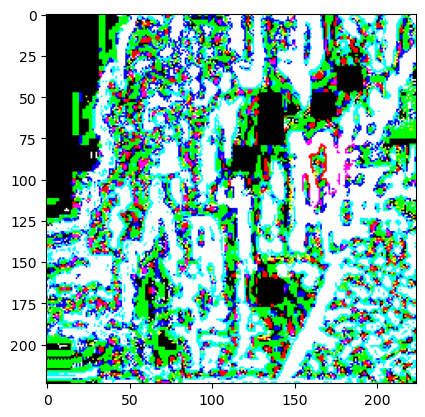

2023-07-21 09:56:32.238244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1025]
	 [[{{node Placeholder/_0}}]]
2023-07-21 09:56:32.238504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1025]
	 [[{{node Placeholder/_4}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test img lbl: 0


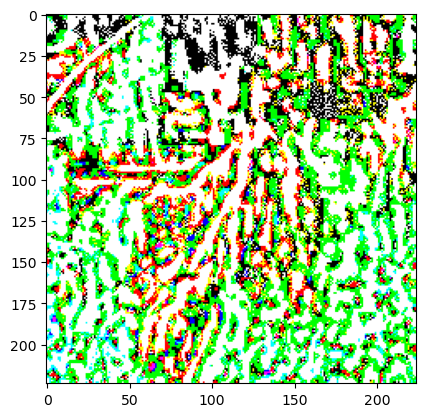

2023-07-21 09:56:32.491003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1025]
	 [[{{node Placeholder/_4}}]]
2023-07-21 09:56:32.491231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1025]
	 [[{{node Placeholder/_0}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


val img lbl: 1


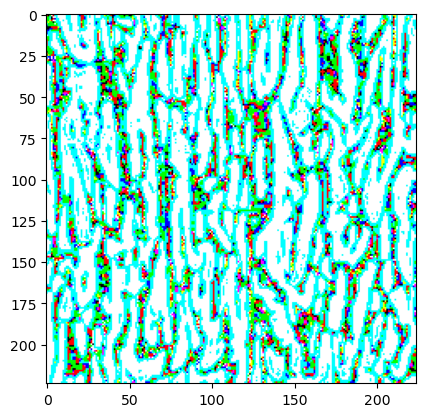

In [12]:
# train_ds
for img, lbl in train_ds:
    print(f"train img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

# test_ds
for img, lbl in test_ds:
    print(f"test img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

# val_ds
for img, lbl in val_ds:
    print(f"val img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

In [13]:
# data augmentation function
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

rescale_layer = tf.keras.Sequential([
    layers.Rescaling(1./255)
])

Testing data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


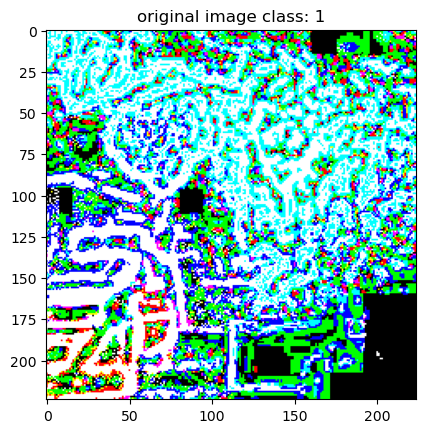

In [14]:
# extarcting an image for augmentation testing

image, lbl = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(f"original image class: {lbl}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


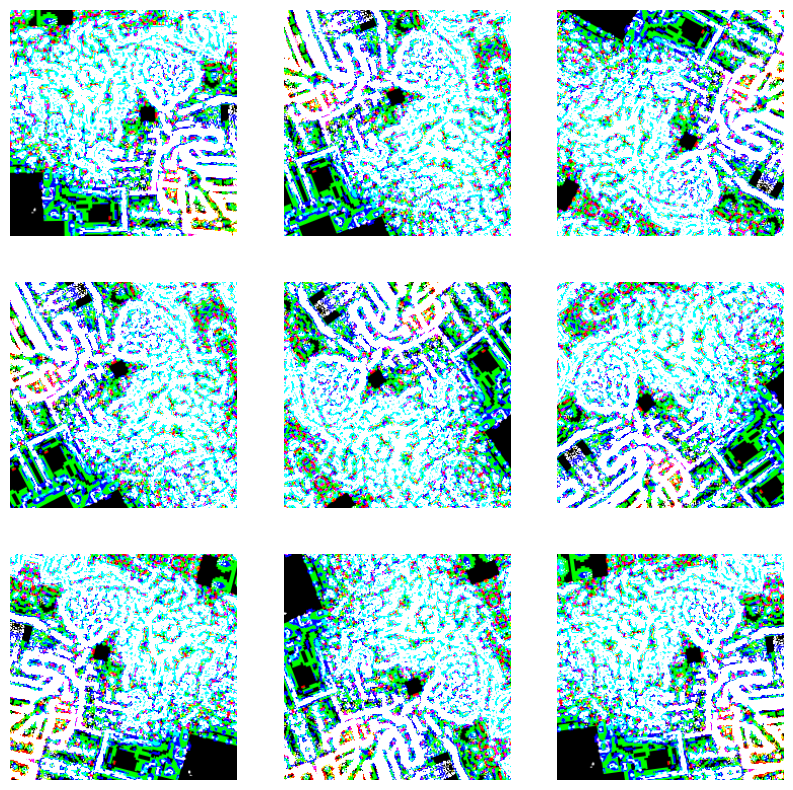

In [15]:
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [16]:
# Function to apply data augmentation to the dataset

batch_size = 32

AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
    # shuffle dataset if needed
    if shuffle:
        ds = ds.shuffle(1000)
    
    # batch the dataset 
    # ds = ds.batch(batch_size)

    # rescale the dataset
    ds = ds.map(lambda x, y: (rescale_layer(x), y), num_parallel_calls=AUTOTUNE)

    # use data augment if needed 
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    
    # use buffered prefercting on all datasets
    return ds

def make_ds_prefetch(ds):
    return ds.prefetch(buffer_size=AUTOTUNE)

def make_into_batches(ds):
    return ds.batch(batch_size)

In [17]:
# applying augmentation to the train_ds
train_ds_augment = prepare(train_ds, shuffle=True, augment=True)
train_ds = prepare(train_ds, shuffle=True, augment=False)

2023-07-21 09:56:34.000299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_22' with dtype resource
	 [[{{node Placeholder/_22}}]]
2023-07-21 09:56:34.000572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_22' with dtype resource
	 [[{{node Placeholder/_22}}]]


train_ds_augment img lbl: 0


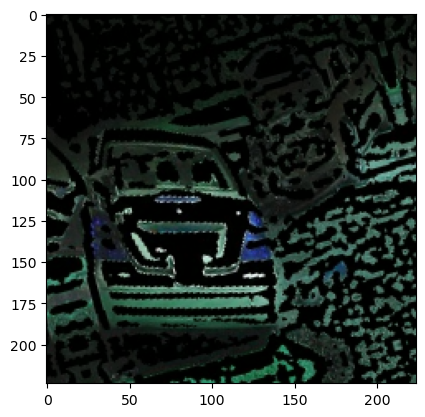

In [18]:
# check train_ds_augment
for img, lbl in train_ds_augment:
    print(f"train_ds_augment img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

In [19]:
train_ds_batch = make_into_batches(train_ds_augment)

In [20]:
val_ds = prepare(val_ds, shuffle=False, augment=False)

In [21]:
val_ds_batch = make_into_batches(val_ds)

In [22]:
for img_batch , lbl_batch in train_ds:
    print(f"train_ds_augment img_batch shape: {img_batch.shape}")
    print(f"train_ds_augment lbl_batch shape: {lbl_batch.shape}")
    break

2023-07-21 09:56:34.848725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2393]
	 [[{{node Placeholder/_4}}]]
2023-07-21 09:56:34.849012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2393]
	 [[{{node Placeholder/_4}}]]


train_ds_augment img_batch shape: (224, 224, 3)
train_ds_augment lbl_batch shape: ()


In [23]:
def model(input_shape):
    input_t = tf.keras.Input(shape=input_shape)
    base_model=tf.keras.Sequential()
    base_model.add(tf.keras.applications.ResNet50(include_top=False, weights='imagenet',input_tensor=input_t))
    base_model.add(tf.keras.layers.Flatten())
    base_model.add(tf.keras.layers.Dropout(0.2))
    base_model.add(tf.keras.layers.Dense(2048, activation='relu'))
    base_model.add(tf.keras.layers.Dropout(0.25))
    base_model.add(tf.keras.layers.Dense(1024, activation='relu'))
    base_model.add(tf.keras.layers.Dropout(0.2))
    base_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return base_model

In [24]:
# creating the model
base_model=model((224,224,3))
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2048)              205522944 
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

In [25]:
base_model.layers[0].trainable=False
base_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',metrics.Precision()])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
steps_per_epoch=10
epochs=10
history = base_model.fit(train_ds_batch,epochs=15,validation_data=val_ds_batch,callbacks=[tensorboard_callback])

Epoch 1/15


2023-07-21 09:56:36.641726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_22' with dtype resource
	 [[{{node Placeholder/_22}}]]
2023-07-21 09:56:36.642035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2393]
	 [[{{node Placeholder/_4}}]]
2023-07-21 09:56:38.956523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-21 09:56:39.870436: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f891a575df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-21 09:5

75/75 [==============================] - ETA: 0s - loss: 5.0878 - accuracy: 0.5896 - precision: 0.6725

2023-07-21 09:56:47.210945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1025]
	 [[{{node Placeholder/_4}}]]
2023-07-21 09:56:47.211212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1025]
	 [[{{node Placeholder/_4}}]]


75/75 [==============================] - 13s 125ms/step - loss: 5.0878 - accuracy: 0.5896 - precision: 0.6725 - val_loss: 0.6124 - val_accuracy: 0.7256 - val_precision: 0.7645
Epoch 2/15
75/75 [==============================] - 8s 102ms/step - loss: 0.6313 - accuracy: 0.6582 - precision: 0.7015 - val_loss: 0.5864 - val_accuracy: 0.6852 - val_precision: 0.6835
Epoch 3/15
75/75 [==============================] - 8s 103ms/step - loss: 0.5917 - accuracy: 0.6841 - precision: 0.7190 - val_loss: 0.5004 - val_accuracy: 0.7396 - val_precision: 0.7678
Epoch 4/15
75/75 [==============================] - 8s 103ms/step - loss: 0.5722 - accuracy: 0.6937 - precision: 0.7287 - val_loss: 0.5082 - val_accuracy: 0.7201 - val_precision: 0.7139
Epoch 5/15
75/75 [==============================] - 8s 102ms/step - loss: 0.5623 - accuracy: 0.7066 - precision: 0.7364 - val_loss: 0.5327 - val_accuracy: 0.6797 - val_precision: 0.6779
Epoch 6/15
75/75 [==============================] - 8s 103ms/step - loss: 0.5745